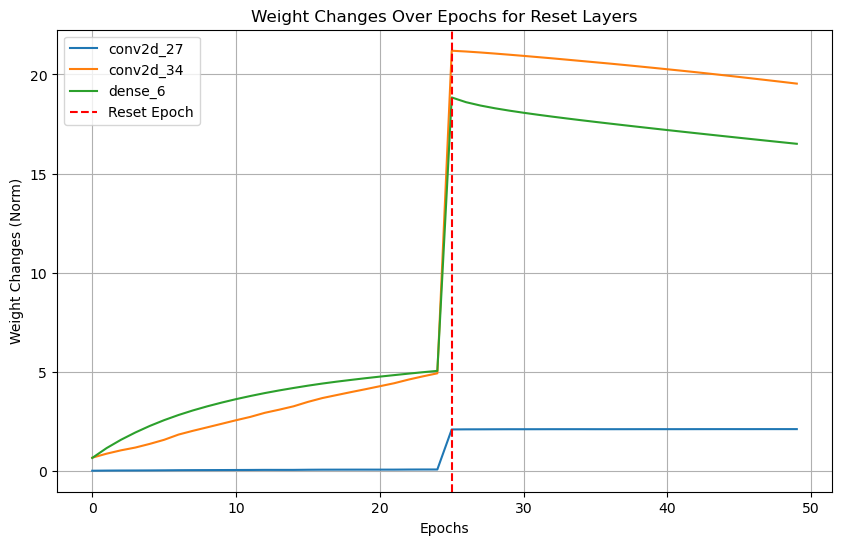

In [17]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open('/Users/vonguyen/Downloads/layer_weight_changes_with_recovery.json', 'r') as file:
    data = json.load(file)

# Extract weight changes
weight_changes = data['weight_changes']
epochs = list(range(len(weight_changes)))

# Define the layers of interest (reset layers)
layers_of_interest = ['conv2d_27', 'conv2d_34', 'dense_6']

# Plot weight changes for the layers of interest
plt.figure(figsize=(10, 6))
for layer in layers_of_interest:
    changes = [epoch[layer] for epoch in weight_changes if layer in epoch]
    plt.plot(epochs, changes, label=layer)

# Add reset epoch line
reset_epoch = 25
plt.axvline(x=reset_epoch, color='red', linestyle='--', label='Reset Epoch')

# Chart details
plt.title("Weight Changes Over Epochs for Reset Layers")
plt.xlabel("Epochs")
plt.ylabel("Weight Changes (Norm)")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
'''
Key Observations

1. Reset Behavior in Both Charts:

Both charts now reflect the behavior of reset layers (conv2d_27, conv2d_34, and dense_6).
The spike at epoch 25 occurs in both charts, marking the reset.

2. Comparison Post-Reset (Adaptation):

Chart 1 (Original): Focuses on the stabilization of weight changes post-reset but doesn't measure the speed directly. 
It shows flat lines post-reset, indicating stabilization.
Chart 2 (Adaptation Speed): Adds insight into the rate of change (adaptation speed). 
You may see that layers stabilize at a similar point, but the slopes immediately after the reset (steepness) may vary, 
reflecting differences in how quickly each layer adapted.

Conclusion:
If the improved adaptation method doesn't significantly affect the behavior of layers (conv2d_27, conv2d_34, dense_6), 
both charts would look similar. This suggests:

The layers stabilize at roughly the same rate in both versions of the system.
The improvement may not impact the reset layers as much, or the change may be too subtle to appear in these metrics.
'''

"\nKey Observations\n\n1. Reset Behavior in Both Charts:\n\nBoth charts now reflect the behavior of reset layers (conv2d_27, conv2d_34, and dense_6).\nThe spike at epoch 25 occurs in both charts, marking the reset.\n\n2. Comparison Post-Reset (Adaptation):\n\nChart 1 (Original): Focuses on the stabilization of weight changes post-reset but doesn't measure the speed directly. \nIt shows flat lines post-reset, indicating stabilization.\nChart 2 (Adaptation Speed): Adds insight into the rate of change (adaptation speed). \nYou may see that layers stabilize at a similar point, but the slopes immediately after the reset (steepness) may vary, \nreflecting differences in how quickly each layer adapted.\n\nConclusion:\nIf the improved adaptation method doesn't significantly affect the behavior of layers (conv2d_27, conv2d_34, dense_6), \nboth charts would look similar. This suggests:\n\nThe layers stabilize at roughly the same rate in both versions of the system.\nThe improvement may not impac

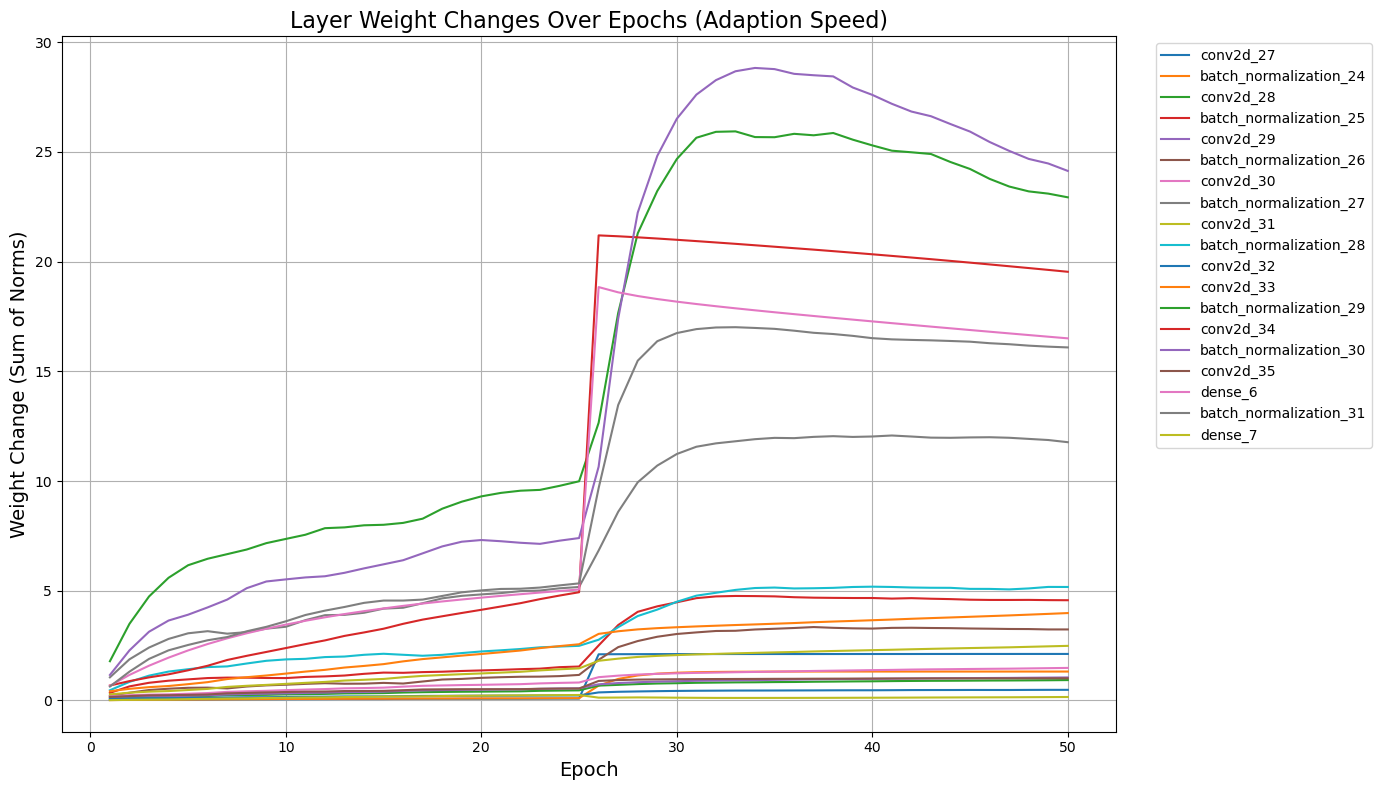

In [21]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open('/Users/vonguyen/Downloads/layer_weight_changes_with_recovery.json', 'r') as file:
    data = json.load(file)

# Prepare data for plotting
epochs = list(range(1, len(weight_changes) + 1))  # Epoch numbers
layer_names = weight_changes[0].keys()  # Layer names

# Aggregate changes for each layer across epochs
layer_changes = {layer: [] for layer in layer_names}

for epoch_data in weight_changes:
    for layer, change in epoch_data.items():
        layer_changes[layer].append(change)

# Plot the changes
plt.figure(figsize=(14, 8))

for layer, changes in layer_changes.items():
    plt.plot(epochs, changes, label=layer)

plt.title("Layer Weight Changes Over Epochs (Adaption Speed)", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Weight Change (Sum of Norms)", fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
'''
Similar like the 1st implementation, we notice there are two non-reset layers exceed the weight changes of the reset layers in the chart 
for after improvement raises an interesting point about network dynamics.

We could say that:

1. Better Performance Is Not Guaranteed by Resets Alone
Resetting layers is intended to speed up their adaptation and prevent stagnation in their learning. 
However, this does not mean reset layers always dominate in terms of weight changes or contribution.
Non-reset layers may exhibit significant learning because they continue to accumulate gradual improvements throughout the epochs.

2. Non-Reset Layers Can Outperform Reset Layers
The non-reset layers showing larger weight changes indicate they are learning and adapting effectively without requiring resets.
This suggests that certain layers are more sensitive to the dataset or task, 
and their steady optimization over time contributes significantly to the model's learning.


'''